In [131]:
import csv
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
berdo2017 = pd.read_csv("berdo2017.csv",encoding='latin-1')

In [133]:
berdo2017_type_eui = berdo2017.loc[:,["Property Type","Site EUI (kBTU/sf)"]]
type_eui_2017 = berdo2017_type_eui[berdo2017_type_eui["Site EUI (kBTU/sf)"]!="Not Available"]

In [134]:
for i in range(len(type_eui_2017)):
    type_eui_2017.iloc[i][1] = float(type_eui_2017.iloc[i][1])
type_eui_2017count = type_eui_2017.copy()
type_eui_2017count["count"] = np.ones(len(type_eui_2017))
count = type_eui_2017count.groupby("Property Type", as_index = False).sum()
type_eui_2017.sort_values(by='Site EUI (kBTU/sf)', ascending=False)
to_drop = []
for key,value in type_eui_2017.iterrows():
    if value[1]>800:
        to_drop.append(key)
to_drop.append(1521) #special case.Only one "Other-Utility" with 500+ EUI.
type_eui_2017 = type_eui_2017.drop(to_drop)
type_eui_2017.sort_values(by='Site EUI (kBTU/sf)', ascending=False)
eui2017 = type_eui_2017.groupby("Property Type", as_index = False).sum()
eui2017.columns = ['Property_Type','EUI']
eui2017

,Property_Type,EUI
0,Adult Education,121.2
1,Ambulatory Surgical Center,205.9
2,Aquarium,76.8
3,Automobile Dealership,134.5
4,Barracks,54.3
5,College/University,7124.7
6,Courthouse,75.5
7,Distribution Center,313.2
8,Enclosed Mall,19.8
9,Energy/Power Station,103.4


In [136]:
berdo2016 = pd.read_excel("2016-reported-energy-and-water-metrics.xlsx",encoding='latin-1')

In [137]:
berdo2016_type_eui = berdo2016.loc[:,["Property Type","Site EUI (kBTU/sf)"]]
type_eui_2016 = berdo2016_type_eui[berdo2016_type_eui["Site EUI (kBTU/sf)"]!="Not Available"]

In [138]:
for i in range(len(type_eui_2016)):
    type_eui_2016.iloc[i][1] = float(type_eui_2016.iloc[i][1])
type_eui_2016count = type_eui_2016.copy()
type_eui_2016count["count"] = np.ones(len(type_eui_2016))
count = type_eui_2016count.groupby("Property Type", as_index = False).sum()
type_eui_2016.sort_values(by='Site EUI (kBTU/sf)', ascending=False)
eui2016 = type_eui_2016.groupby("Property Type", as_index = False).sum()
eui2016.columns = ['Property_Type','EUI']
eui2016

,Property_Type,EUI
0,Adult Education,84.50
1,Ambulatory Surgical Center,205.20
2,Automobile Dealership,15763.60
3,College/University,9238.50
4,Courthouse,82.50
5,Distribution Center,745.20
6,Energy/Power Station,139.50
7,Financial Office,891.60
8,Fire Station,5022.40
9,Fitness Center/Health Club/Gym,774.30


In [139]:
berdo2015 = pd.read_excel("2015-reported-energy-and-water-metrics.xlsx",encoding='latin-1')

In [140]:
berdo2015_type_eui = berdo2015.loc[:,["Property Type","Site EUI (kBTU/sf)"]]
type_eui_2015 = berdo2015_type_eui[berdo2015_type_eui["Site EUI (kBTU/sf)"]!="Not Available"]

In [141]:
for i in range(len(type_eui_2015)):
    type_eui_2015.iloc[i][1] = float(type_eui_2015.iloc[i][1])
type_eui_2015count = type_eui_2015.copy()
type_eui_2015count["count"] = np.ones(len(type_eui_2015))
count = type_eui_2015count.groupby("Property Type", as_index = False).sum()
type_eui_2015.sort_values(by='Site EUI (kBTU/sf)', ascending=False)
eui2015 = type_eui_2015.groupby("Property Type", as_index = False).sum()
eui2015.columns = ['Property_Type','EUI']
eui2015

,Property_Type,EUI
0,Ambulatory Surgical Center,173.100000
1,Automobile Dealership,28.700000
2,Barracks,49.800000
3,College/University,82159.700000
4,Courthouse,90.100000
5,Distribution Center,372.700000
6,Energy/Power Station,109.100000
7,Financial Office,719.400000
8,Fire Station,5133.400000
9,Fitness Center/Health Club/Gym,69675.100000


In [165]:
types2017 = []
for row in eui2017.itertuples():
    if row.Property_Type not in types2017:
        types2017.append(row.Property_Type)

In [164]:
types2016 = []
for row in eui2016.itertuples():
    if row.Property_Type not in types2016:
        types2016.append(row.Property_Type)

In [163]:
types2015 = []
for row in eui2015.itertuples():
    if row.Property_Type not in types2015:
        types2015.append(row.Property_Type)

In [146]:
common = []
for types in types2017:
    if types in types2016 and types in types2015:
        common.append(types)
common

['Ambulatory Surgical Center',
 'Automobile Dealership',
 'College/University',
 'Courthouse',
 'Distribution Center',
 'Energy/Power Station',
 'Financial Office',
 'Fire Station',
 'Fitness Center/Health Club/Gym',
 'Hospital (General Medical & Surgical)',
 'Hotel',
 'Ice/Curling Rink',
 'Indoor Arena',
 'K-12 School',
 'Laboratory',
 'Library',
 'Manufacturing/Industrial Plant',
 'Medical Office',
 'Mixed Use Property',
 'Movie Theater',
 'Multifamily Housing',
 'Museum',
 'Non-Refrigerated Warehouse',
 'Office',
 'Other',
 'Other - Education',
 'Other - Entertainment/Public Assembly',
 'Other - Lodging/Residential',
 'Other - Public Services',
 'Other - Recreation',
 'Other - Specialty Hospital',
 'Other - Stadium',
 'Outpatient Rehabilitation/Physical Therapy',
 'Parking',
 'Performing Arts',
 'Police Station',
 'Repair Services (Vehicle, Shoe, Locksmith, etc.)',
 'Residence Hall/Dormitory',
 'Retail Store',
 'Self-Storage Facility',
 'Senior Care Community',
 'Single Family Home'

In [148]:
len(common)

48

In [157]:
#'Laboratory'
#columns = ['2015', '2016', '2017']
lab = {}
for row in eui2017.itertuples():
    if row.Property_Type == 'Laboratory':
        lab['2017'] = [row.EUI]
for row in eui2016.itertuples():
    if row.Property_Type == 'Laboratory':
        lab['2016'] = [row.EUI]
for row in eui2015.itertuples():
    if row.Property_Type == 'Laboratory':
        lab['2015'] = [row.EUI]
lab = pd.DataFrame(lab)
lab

,2015,2016,2017
0,11287.0,10772.7,9907.1


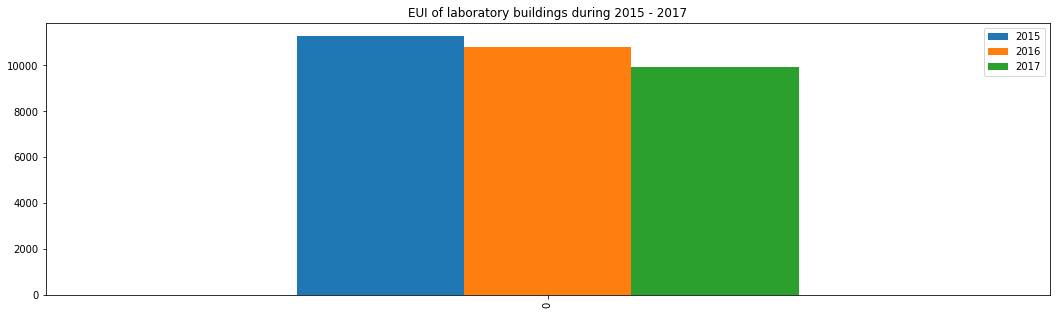

In [158]:
lab.plot.bar(figsize=(18,5),title= "EUI of laboratory buildings during 2015 - 2017")

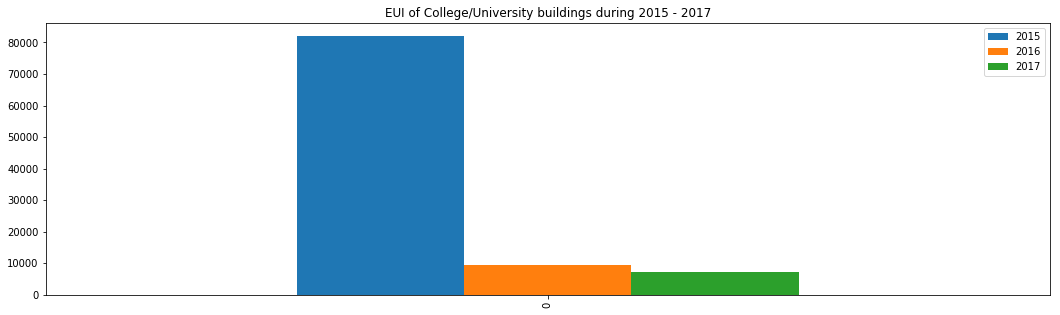

In [174]:
#'College/University'
College = {}
for row in eui2017.itertuples():
    if row.Property_Type == 'College/University':
        College['2017'] = [row.EUI]
for row in eui2016.itertuples():
    if row.Property_Type == 'College/University':
        College['2016'] = [row.EUI]
for row in eui2015.itertuples():
    if row.Property_Type == 'College/University':
        College['2015'] = [row.EUI]
College = pd.DataFrame(College)
College.plot.bar(figsize=(18,5),title= "EUI of College/University buildings during 2015 - 2017")

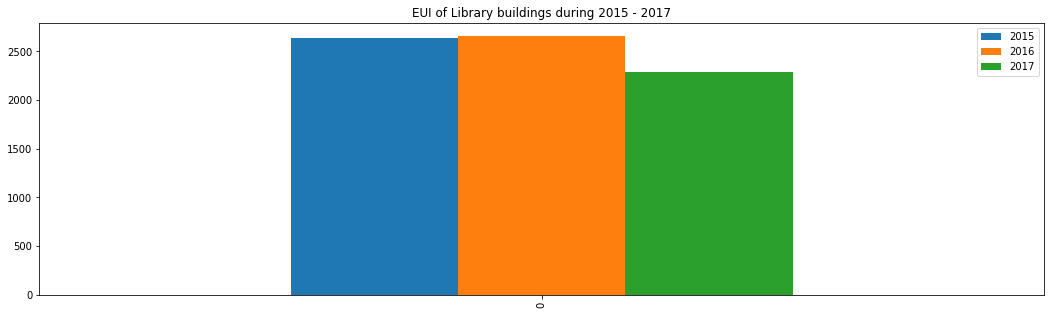

In [167]:
#Library

Library = {}
for row in eui2017.itertuples():
    if row.Property_Type == 'Library':
        Library['2017'] = [row.EUI]
for row in eui2016.itertuples():
    if row.Property_Type == 'Library':
        Library['2016'] = [row.EUI]
for row in eui2015.itertuples():
    if row.Property_Type == 'Library':
        Library['2015'] = [row.EUI]
Library = pd.DataFrame(Library)
Library
Library.plot.bar(figsize=(18,5),title= "EUI of Library buildings during 2015 - 2017")

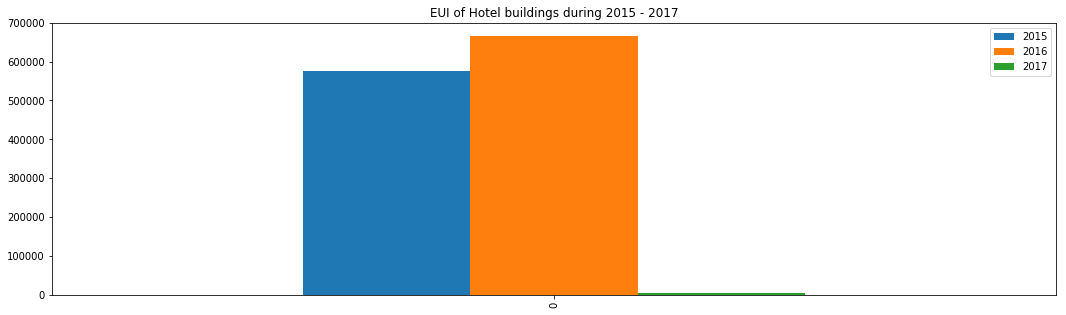

In [168]:
#Hotel
Hotel = {}
for row in eui2017.itertuples():
    if row.Property_Type == 'Hotel':
        Hotel['2017'] = [row.EUI]
for row in eui2016.itertuples():
    if row.Property_Type == 'Hotel':
        Hotel['2016'] = [row.EUI]
for row in eui2015.itertuples():
    if row.Property_Type == 'Hotel':
        Hotel['2015'] = [row.EUI]
Hotel = pd.DataFrame(Hotel)
Hotel.plot.bar(figsize=(18,5),title= "EUI of Hotel buildings during 2015 - 2017")

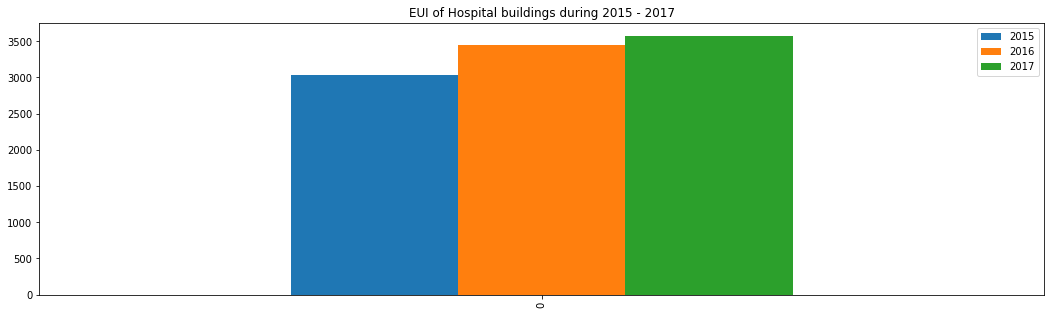

In [171]:
#Hospital (General Medical & Surgical)
Hospital = {}
for row in eui2017.itertuples():
    if row.Property_Type == 'Hospital (General Medical & Surgical)':
        Hospital['2017'] = [row.EUI]
for row in eui2016.itertuples():
    if row.Property_Type == 'Hospital (General Medical & Surgical)':
        Hospital['2016'] = [row.EUI]
for row in eui2015.itertuples():
    if row.Property_Type == 'Hospital (General Medical & Surgical)':
        Hospital['2015'] = [row.EUI]
Hospital = pd.DataFrame(Hospital)
Hospital.plot.bar(figsize=(18,5),title= "EUI of Hospital buildings during 2015 - 2017")

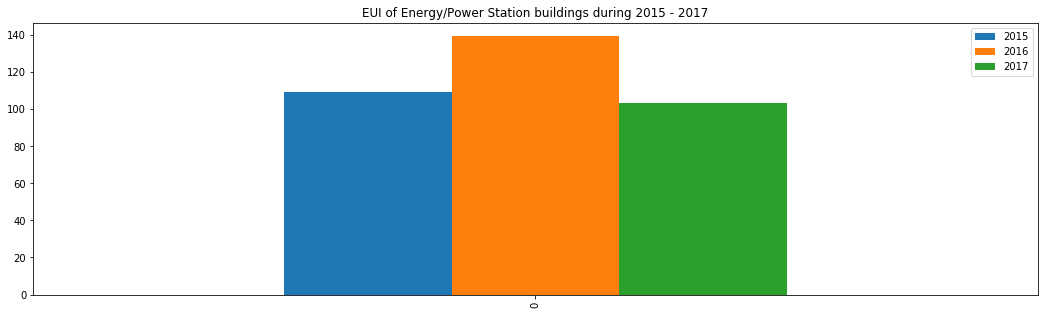

In [172]:
#Energy/Power Station
Energy = {}
for row in eui2017.itertuples():
    if row.Property_Type == 'Energy/Power Station':
        Energy['2017'] = [row.EUI]
for row in eui2016.itertuples():
    if row.Property_Type == 'Energy/Power Station':
        Energy['2016'] = [row.EUI]
for row in eui2015.itertuples():
    if row.Property_Type == 'Energy/Power Station':
        Energy['2015'] = [row.EUI]
Energy = pd.DataFrame(Energy)
Energy.plot.bar(figsize=(18,5),title= "EUI of Energy/Power Station buildings during 2015 - 2017")

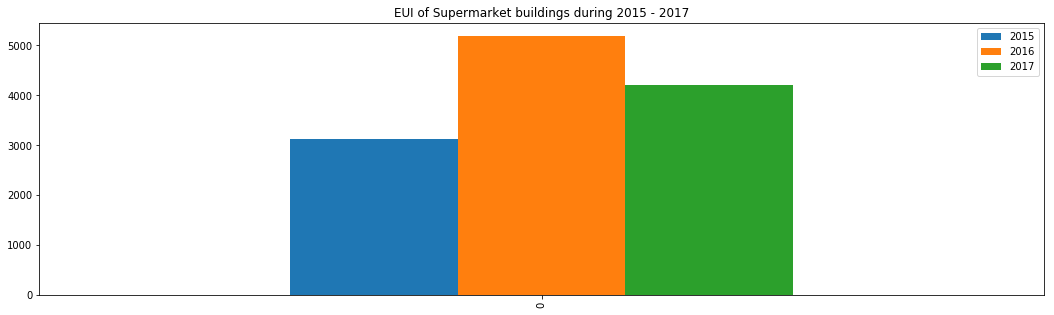

In [175]:
#Supermarket/Grocery Store
Supermarket = {}
for row in eui2017.itertuples():
    if row.Property_Type == 'Supermarket/Grocery Store':
        Supermarket['2017'] = [row.EUI]
for row in eui2016.itertuples():
    if row.Property_Type == 'Supermarket/Grocery Store':
        Supermarket['2016'] = [row.EUI]
for row in eui2015.itertuples():
    if row.Property_Type == 'Supermarket/Grocery Store':
        Supermarket['2015'] = [row.EUI]
Supermarket = pd.DataFrame(Supermarket)
Supermarket.plot.bar(figsize=(18,5),title= "EUI of Supermarket buildings during 2015 - 2017")

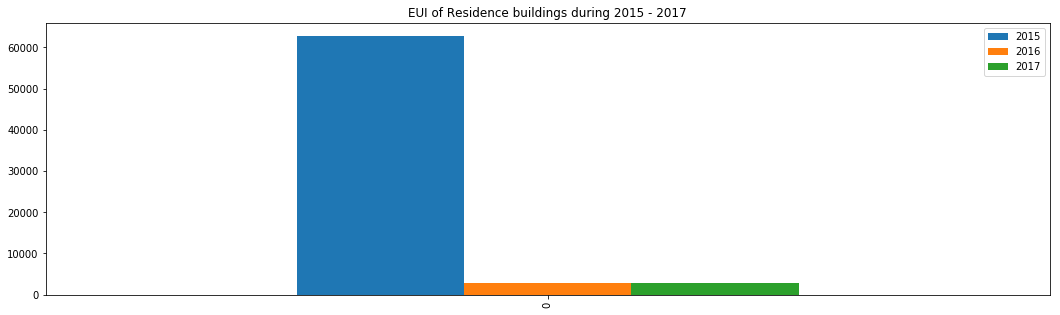

In [176]:
#Residence Hall/Dormitory
Residence = {}
for row in eui2017.itertuples():
    if row.Property_Type == 'Residence Hall/Dormitory':
        Residence['2017'] = [row.EUI]
for row in eui2016.itertuples():
    if row.Property_Type == 'Residence Hall/Dormitory':
        Residence['2016'] = [row.EUI]
for row in eui2015.itertuples():
    if row.Property_Type == 'Residence Hall/Dormitory':
        Residence['2015'] = [row.EUI]
Residence = pd.DataFrame(Residence)
Residence.plot.bar(figsize=(18,5),title= "EUI of Residence buildings during 2015 - 2017")